In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer, KNNImputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve



In [2]:
features_df = pd.read_csv('../Data/training_set_features.csv')
labels_df = pd.read_csv('../Data/training_set_labels.csv')

# check that the rows between the features and the labels match up
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

# merge features_df and labels_df 
df = labels_df.merge(features_df, how = 'inner', on='respondent_id')

# drop duplicate 
df.drop_duplicates(inplace=True)

In [3]:
df.shape

(26707, 38)

In [4]:
df.info()

# 17  health_insurance, 36  employment_industry, 37  employment_occupation  about 50% missing 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   h1n1_concern                 26615 non-null  float64
 4   h1n1_knowledge               26591 non-null  float64
 5   behavioral_antiviral_meds    26636 non-null  float64
 6   behavioral_avoidance         26499 non-null  float64
 7   behavioral_face_mask         26688 non-null  float64
 8   behavioral_wash_hands        26665 non-null  float64
 9   behavioral_large_gatherings  26620 non-null  float64
 10  behavioral_outside_home      26625 non-null  float64
 11  behavioral_touch_face        26579 non-null  float64
 12  doctor_recc_h1n1             24547 non-null  float64
 13  doctor_recc_seas

In [5]:
# Check balance of target variables 

print("H1N1 Vaccination (counts)")
print(df["h1n1_vaccine"].value_counts())
print()
print("Seasonal Flu Vaccination (counts)")
print(df["seasonal_vaccine"].value_counts())
print()
print("H1N1 Vaccination (percentages)")
print(df["h1n1_vaccine"].value_counts(normalize=True))
print()
print("Seasonal Flu Vaccination (percentages)")
print(df["seasonal_vaccine"].value_counts(normalize=True))

# Only 21% of people are vaccinated. H1N1 vaccination data is highly imbalanced. 
# For model tuning, use SMOTE or other methods.  



H1N1 Vaccination (counts)
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Seasonal Flu Vaccination (counts)
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

H1N1 Vaccination (percentages)
0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

Seasonal Flu Vaccination (percentages)
0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64


### Missing Values

In [6]:
# drop respondent_id
# df.drop('respondent_id', axis=1, inplace=True)

# report missing values 
df.isna().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

#### Data imputation

In [7]:
# drop variables of random characters 

df.drop(['employment_industry',  'employment_occupation', 'hhs_geo_region'], axis=1, inplace=True)



In [8]:
# for socioeconomic categoircal variables, drop missing rows 

df.dropna(subset=['health_worker', 'education','income_poverty', 'marital_status', 
                    'rent_or_own', 'employment_status', 'household_adults', 
                    'household_children' ], inplace=True)


In [9]:
#features_df = pd.read_csv('../Data/training_set_features.csv')
#x_df = features_df

survey_col = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective', 'opinion_seas_risk','opinion_seas_sick_from_vacc']

behavior_col = ['behavioral_antiviral_meds', 'behavioral_face_mask',
                'behavioral_large_gatherings','behavioral_outside_home']

behavior_col_2 = ['behavioral_avoidance', 
                'behavioral_wash_hands','behavioral_touch_face']


doc_rec = ['doctor_recc_h1n1','doctor_recc_seasonal']

def impute_missing_data(dataframe, column_list, fillvalue):
    for column in column_list:
        dataframe[column].fillna(fillvalue, inplace = True)
      
    
impute_missing_data(df, survey_col, 3)
impute_missing_data(df, ['h1n1_concern'], 2)
impute_missing_data(df, ['h1n1_knowledge'], 0)
impute_missing_data(df, behavior_col, 0)
impute_missing_data(df, behavior_col_2, 1)
impute_missing_data(df, doc_rec, 0)
impute_missing_data(df, ['chronic_med_condition'], 0)
impute_missing_data(df, ['child_under_6_months'], 0)


In [10]:
df.isnull().sum()

respondent_id                     0
h1n1_vaccine                      0
seasonal_vaccine                  0
h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance               9400
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_h1n1_sick_from_vacc       0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                         0
race                              0
sex                         

#### train_test_split

In [11]:
# Define X and y, 30-70(training)

X=df.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1)
y=df[['h1n1_vaccine','seasonal_vaccine']]

# Train test split 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_train #15304 rows 

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
26356,26356,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",0.0,1.0
1925,1925,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Some College,White,Female,"> $75,000",Not Married,Own,Employed,Non-MSA,0.0,0.0
2668,2668,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0
5325,5325,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,Non-MSA,0.0,0.0
841,841,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Unemployed,"MSA, Principle City",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,14593,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0
26345,26345,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,< 12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
6555,6555,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"> $75,000",Married,Rent,Employed,"MSA, Principle City",1.0,0.0
1035,1035,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,3.0,2.0


#### Imputing Health Insurance 

In [12]:
X_train.shape

(15304, 33)

In [13]:
# create dummies for objects to use for KNNImputer

X_train_obj = X_train.select_dtypes(include='object')

# one hot encoding for objects 
ohe = OneHotEncoder(drop='first', sparse=False)

dums = ohe.fit_transform(X_train_obj)

dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_obj.index)

dums_df
dums_df.shape #15304 rows 



(15304, 19)

In [14]:
dums_df

,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,"x8_MSA, Principle City",x8_Non-MSA
26356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1925,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2668,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5325,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
841,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26345,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6555,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1035,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [24]:
# Imputation using other socio-econmic features  

dums_df_insurance = pd.concat([X_train.health_insurance, dums_df], axis=1)

knnimpute = KNNImputer()
dums_df_insurance_imputed = pd.DataFrame(knnimpute.fit_transform(dums_df_insurance), 
                                         columns = dums_df_insurance.columns,
                                        index=dums_df_insurance.index)

dums_df_insurance_imputed # 15304 rows


,health_insurance,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,"x8_MSA, Principle City",x8_Non-MSA
26356,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1925,0.8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2668,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5325,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
841,0.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26345,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6555,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1035,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
dums_df_insurance_imputed.health_insurance.value_counts()

1.0    12105
0.8     1278
0.0     1046
0.6      582
0.4      216
0.2       77
Name: health_insurance, dtype: int64

In [26]:
# convert to 0,1 value 


dums_df_insurance_imputed.health_insurance = (dums_df_insurance_imputed.health_insurance
                                              > 0.5).astype(int)

dums_df_insurance_imputed.health_insurance.value_counts()


1    13965
0     1339
Name: health_insurance, dtype: int64

In [27]:
dums_df_insurance_imputed


,health_insurance,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,"x8_MSA, Principle City",x8_Non-MSA
26356,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1925,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2668,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5325,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
841,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26345,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6555,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1035,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
X_train_obj.columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'census_msa'],
      dtype='object')

In [29]:
# Drop the old object columns and health insurance column from X_train 
# and concat the imputed df. 

X_train_1 = X_train.drop(X_train_obj.columns, axis=1)
X_train_1 = X_train_1.drop('health_insurance', axis=1)

X_train_imputed = pd.concat([X_train_1, dums_df_insurance_imputed], axis=1)



X_train_imputed


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,"x8_MSA, Principle City",x8_Non-MSA
26356,26356,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1925,1925,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2668,2668,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5325,5325,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
841,841,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,14593,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26345,26345,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6555,6555,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1035,1035,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [30]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15304 entries, 26356 to 19277
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      15304 non-null  int64
 1   seasonal_vaccine  15304 non-null  int64
dtypes: int64(2)
memory usage: 358.7 KB


#### Imputing Health insurance for the test set

In [31]:


X_test_obj = X_test.select_dtypes(include='object')

# one hot encoding for objects 
# ohe = OneHotEncoder(drop='first', sparse=False)

dumstest = ohe.transform(X_test_obj)

dums_df2 = pd.DataFrame(dumstest,
                       columns=ohe.get_feature_names(),
                       index=X_test_obj.index)

dums_df2
dums_df2.shape #15304 rows 



(6559, 19)

In [32]:
dums_df_insurancetest = pd.concat([X_test.health_insurance, dums_df2], axis=1)

#knnimpute = KNNImputer()
dums_df_insurance_imputedtest = pd.DataFrame(knnimpute.transform(dums_df_insurancetest), 
                                         columns = dums_df_insurancetest.columns,
                                        index=dums_df_insurancetest.index)

dums_df_insurance_imputedtest

,health_insurance,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,"x8_MSA, Principle City",x8_Non-MSA
15045,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
14123,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
25010,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
24771,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23611,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7735,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20174,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19888,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22054,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [33]:

dums_df_insurance_imputedtest.health_insurance = (dums_df_insurance_imputedtest.health_insurance
                                              > 0.5).astype(int)

dums_df_insurance_imputedtest.health_insurance.value_counts()


1    5966
0     593
Name: health_insurance, dtype: int64

In [34]:
X_test_1 = X_test.drop(X_test_obj.columns, axis=1)
X_test_1 = X_test_1.drop('health_insurance', axis=1)

X_test_imputed = pd.concat([X_test_1, dums_df_insurance_imputedtest], axis=1)



X_test_imputed

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,"x8_MSA, Principle City",x8_Non-MSA
15045,15045,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
14123,14123,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
25010,25010,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
24771,24771,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23611,23611,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7735,7735,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20174,20174,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19888,19888,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22054,22054,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [35]:
#drop respondentID for training and test so it doesn't influence features and model

X_train2 = X_train_imputed.drop('respondent_id', axis=1)
X_test2 = X_test_imputed.drop('respondent_id', axis=1)
# y_train = y_train.drop('respondent_id', axis=1)
# y_test = y_test.drop('respondent_id', axis=1)

## Now that the training data is clean and Health Insurance has been imputed, we can begin to create our training models


#### Model Creation: kNN

In [36]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
knn.fit(X_train2, y_train)

KNeighborsClassifier()

In [65]:


y_pred = knn.predict(X_test2)
print(cross_val_score(knn, X_test2, y_test, scoring='roc_auc', cv=5))
print(cross_val_score(knn, X_test2, y_test, scoring='roc_auc', cv=5).mean())

[0.75723363 0.7222886  0.75997353 0.75457989 0.74839608]
0.7484943463015549


#### Model Tuning for kNN

In [38]:
#function to find best k 
#consider using GridSearchCV()

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    return best_k

In [ ]:
#Using GridSearchCV
from sklearn.model_selection import GridSearchCV



In [39]:

from sklearn.metrics import f1_score

x = find_best_k(X_train2, y_train, X_test2, y_test, min_k=1, max_k=29)

Best Value for k: 21
F1-Score: 0.6379014976210711


In [40]:
#can we change metrics to find best performer using best k?

def find_best_metric(X_train, y_train, X_test, y_test, metric_list, best_k):
    best_metric = ''
    best_score = 0
    for val in metric_list:
        knn2 = KNeighborsClassifier(n_neighbors=best_k, metric=val)
        knn2.fit(X_train, y_train)
        y_pred = knn2.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        if f1 > best_score:
            best_metric = val
            best_score = f1
    print("Best metric: {}".format(best_metric))  
    print("F1-Score: {}".format(best_score))
    return best_metric

In [41]:


metrics = ['euclidean', 'manhattan', 'minkowski']

bmetric = find_best_metric(X_train2, y_train, X_test2, y_test, metrics, x)

Best metric: manhattan
F1-Score: 0.6412387265471116


In [42]:
kNN = KNeighborsClassifier(n_neighbors=x, metric=bmetric)
kNN.fit(X_train2, y_train)

print(cross_val_score(kNN, X_test2, y_test['h1n1_vaccine'], scoring='roc_auc', cv=5).mean())

0.7833528414473829


In [43]:
print(cross_val_score(kNN, X_test2, y_test['seasonal_vaccine'], scoring='roc_auc', cv=5).mean())

0.8250748807029803


#### kNN has decent roc_auc scores. Will attempt using decisiontreeclassifiers

In [44]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(X_train2, y_train)


DecisionTreeClassifier(criterion='entropy')

In [45]:
y_dt_pred = dt.predict(X_test2)
#accuracy_score(y_test, y_dt_pred)
print(cross_val_score(dt, X_test2, y_test['seasonal_vaccine'], scoring='roc_auc', cv=5).mean())
print(cross_val_score(dt, X_test2, y_test['h1n1_vaccine'], scoring='roc_auc', cv=5).mean())

0.673640002422289
0.6533800390497719


## Insight: after model tuning with knn, we do not seem to have a good score. This could be due to the nature of some features not being binary. We will use the MultiOutputClassifier with the previous estimators

#### Multioutputclassifier modeling with KNN

In [46]:
#multioutputclassifier attempt

from sklearn.multioutput import MultiOutputClassifier

moc = MultiOutputClassifier(estimator=KNeighborsClassifier()).fit(X_train2, y_train)

In [47]:
preds = moc.predict_proba(X_test2)
preds

[array([[1. , 0. ],
        [0.8, 0.2],
        [0.6, 0.4],
        ...,
        [0.8, 0.2],
        [0.8, 0.2],
        [0.4, 0.6]]),
 array([[0.8, 0.2],
        [0.8, 0.2],
        [0. , 1. ],
        ...,
        [0.2, 0.8],
        [0. , 1. ],
        [0. , 1. ]])]

In [48]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (6559, 2)


,h1n1_vaccine,seasonal_vaccine
15045,0.0,0.2
14123,0.2,0.2
25010,0.4,1.0
24771,0.2,0.4
23611,0.2,1.0


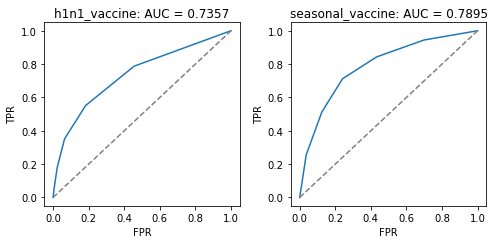

In [49]:
#plotting auc curves

from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )
    
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [50]:
#cross val scores for moc

print(cross_val_score(moc, X_test2, y_test, scoring='roc_auc', cv=5).mean())


0.7484943463015549


#### Multioutputclassifier modeling with DecisionTreeClassifier

In [51]:
#multioutputclassifier with decisiontreeclassifier

MOC = MultiOutputClassifier(estimator=DecisionTreeClassifier()).fit(X_train2, y_train)

preds2 = MOC.predict_proba(X_test2)
preds2

[array([[0., 1.],
        [1., 0.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [0., 1.],
        [0., 1.]])]

In [52]:
y_preds2 = pd.DataFrame(
    {
        "h1n1_vaccine": preds2[0][:, 1],
        "seasonal_vaccine": preds2[1][:, 1],
    },
    index = y_test.index
)
print("y_preds2.shape:", y_preds2.shape)
y_preds2.head()

y_preds2.shape: (6559, 2)


,h1n1_vaccine,seasonal_vaccine
15045,1.0,0.0
14123,0.0,1.0
25010,1.0,1.0
24771,1.0,1.0
23611,0.0,1.0


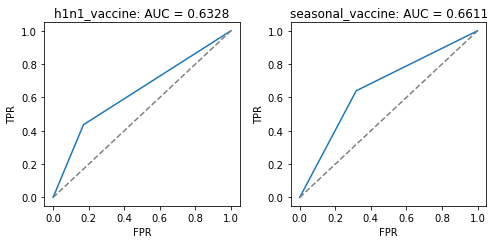

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_preds2['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_preds2['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [54]:
print(cross_val_score(MOC, X_test2, y_test, scoring='roc_auc', cv=5).mean())

0.6597581927939176


#### MOC Decision Tree tuning

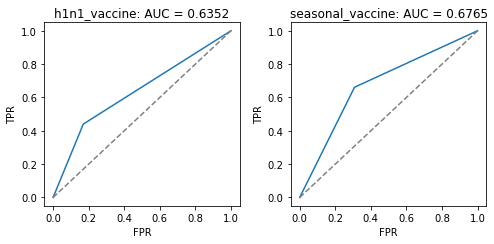

In [55]:
#using 'entropy'


MOC2 = MultiOutputClassifier(estimator=DecisionTreeClassifier(criterion='entropy')).fit(X_train2, y_train)

preds3 = MOC2.predict_proba(X_test2)

y_preds3 = pd.DataFrame(
    {
        "h1n1_vaccine": preds3[0][:, 1],
        "seasonal_vaccine": preds3[1][:, 1],
    },
    index = y_test.index
)

fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_preds3['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_preds3['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [56]:
print(cross_val_score(MOC2, X_test2, y_test, scoring='roc_auc', cv=5).mean())

0.6630833282569085


#### Models still underperform compared to baseline. Will OHE of non-binary variables improve the models?

In [57]:
# One hot encoding for non-binary features
non_binary = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective',
'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
# X_train data
nb_train = X_train[non_binary]
ohe = OneHotEncoder(drop='first', sparse=False)
dums = ohe.fit_transform(nb_train)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=nb_train.index)
# X_test data
nb_test = X_test[non_binary]
dums_t = ohe.transform(nb_test)
dums_t_df = pd.DataFrame(dums_t,
                       columns=ohe.get_feature_names(),
                       index=nb_test.index)
dums_t_df.head()

,x0_1.0,x0_2.0,x0_3.0,x1_1.0,x1_2.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x3_2.0,...,x5_4.0,x5_5.0,x6_2.0,x6_3.0,x6_4.0,x6_5.0,x7_2.0,x7_3.0,x7_4.0,x7_5.0
15045,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14123,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25010,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24771,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
23611,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [58]:
X_train_f = pd.concat([X_train2, dums_df], axis=1)
X_test_f = pd.concat([X_test2, dums_t_df], axis=1)

print(X_train_f.shape)
print(X_test_f.shape)

(15304, 71)
(6559, 71)


#### kNN after final OHE

In [59]:
x1 = find_best_k(X_train_f, y_train, X_test_f, y_test, min_k=1, max_k=29)

Best Value for k: 15
F1-Score: 0.6411916150374775


In [60]:
metric1 = find_best_metric(X_train_f, y_train, X_test_f, y_test, metrics, x1)

Best metric: manhattan
F1-Score: 0.6438448554055879


In [61]:
kNN_f = KNeighborsClassifier(n_neighbors=x1, metric=metric1)

kNN_f.fit(X_train_f, y_train)

y_pred_f = kNN_f.predict_proba(X_test_f)

y_predsf = pd.DataFrame(
    {
        "h1n1_vaccine": y_pred_f[0][:, 1],
        "seasonal_vaccine": y_pred_f[1][:, 1],
    },
    index = y_test.index
)
print("y_predsf.shape:", y_predsf.shape)
y_predsf.head()

y_predsf.shape: (6559, 2)


,h1n1_vaccine,seasonal_vaccine
15045,0.066667,0.600000
14123,0.066667,0.600000
25010,0.400000,1.000000
24771,0.066667,0.200000
23611,0.000000,0.933333


In [62]:
print(cross_val_score(kNN_f, X_test2, y_test['seasonal_vaccine'], scoring='roc_auc', cv=5).mean())
print(cross_val_score(kNN_f, X_test2, y_test['h1n1_vaccine'], scoring='roc_auc', cv=5).mean())



0.8177852927524322
0.7754424153884484


#### OHE of survey variables doesn't seem to improve model performance for kNN. 

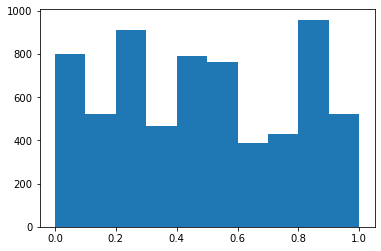

In [63]:
#distribution of probabilities

plt.hist(y_predsf['seasonal_vaccine']);

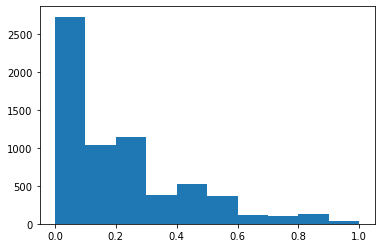

In [64]:
plt.hist(y_predsf['h1n1_vaccine']);

### Insight: The vast majority of indiviuals are predicted to NOT get the H1N1 vaccine, while the distrubtion of those predicted to get the seasonal flu vaccine are is much more varied.